In [99]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

In [100]:
# Chuẩn bị dữ liệu
# Đọc dữ liệu từ file CSV
players = pd.read_csv('./players_with_labels.csv')

### Tách các biến đặc trưng và biến mục tiêu

In [101]:
X = players.iloc[:, :-1]
y = players.iloc[:, -1]

### Chuẩn hoám, scaling dữ liệu cho các biến đặc trưng

In [102]:
min_max = StandardScaler()
X[['tactical', 'age', 'height']] = min_max.fit_transform(X[['tactical', 'age', 'height']])

min_max = MinMaxScaler()
X[['market_value', 'attacking', 'technical', 'defending', 'creativity', 'saves', 'anticipation', 'ball_distribution', 'aerial', 'avg_score_last_12_months', 'appearances_last_12_months', 'point_of_tournament']] = min_max.fit_transform(X[['market_value', 'attacking', 'technical', 'defending', 'creativity', 'saves', 'anticipation', 'ball_distribution', 'aerial', 'avg_score_last_12_months', 'appearances_last_12_months', 'point_of_tournament']])
X.head(3)

#min _max for all
min_max = MinMaxScaler()
X = pd.DataFrame(min_max.fit_transform(X), columns=X.columns)

X.head(3)

X_encoded = X.copy()

In [103]:
X.head()

,market_value,age,height,attacking,technical,tactical,defending,creativity,saves,anticipation,...,avg_score_last_12_months,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_G,pos_M,foot_Both,foot_Left,foot_Right
0,0.184531,0.222222,0.66,0.781609,0.617978,0.5000,0.358696,0.526882,0.0,0.0,...,0.438424,0.410714,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.061961,0.333333,0.46,0.712644,0.539326,0.5375,0.347826,0.505376,0.0,0.0,...,0.300493,0.482143,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.029442,0.222222,0.56,0.735632,0.573034,0.4250,0.315217,0.516129,0.0,0.0,...,0.270936,0.428571,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.071966,0.222222,0.52,0.666667,0.674157,0.4500,0.413043,0.634409,0.0,0.0,...,0.310345,0.482143,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.029442,0.444444,0.62,0.632184,0.561798,0.3750,0.358696,0.473118,0.0,0.0,...,0.280788,0.500000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [104]:
y.value_counts()

cluster
2    3358
3    2607
4    1617
5    1285
6    1059
0     789
7     361
8     294
1     281
Name: count, dtype: int64

## Phân chia dữ liệu thành tập huấn luyện và tập xác thực

In [105]:
# Chia dữ liệu thành 2 phần train và test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


# print(X_train.head())
print(y_train.head())

6308     2
6408     2
3295     4
10887    2
381      6
Name: cluster, dtype: int64


In [106]:
print(len(X_valid))

2331


## Xử lý chuẩn hóa và scaling tập dữ liệu kiểm thử 

In [107]:
players_test = pd.read_csv('./clean_data_test/players.csv')
countries_test = pd.read_csv('./clean_data_test/countries.csv')
clubs_test = pd.read_csv('./clean_data_test/clubs.csv')

players_test = players_test.merge(countries_test[['name', 'points']], how='left', left_on='country', right_on='name')
players_test = players_test.rename(columns={'points': 'point_of_tournament', 'name_x': 'name'})
players_test = players_test.drop('name_y', axis=1)
players_test.drop(['shirt_number'], axis=1, inplace=True)

players_test_root = players_test.copy()

### Lấy các tham số chuẩn hóa và scaling của tập dữ liệu huấn luyện

In [108]:
players_train = pd.read_csv('./clean_data_train/players.csv')
countries_train = pd.read_csv('./clean_data_train/countries.csv')
clubs_train = pd.read_csv('./clean_data_train/clubs.csv')

players_train = players_train.merge(countries_train[['name', 'points']], how='left', left_on='country', right_on='name')
players_train = players_train.rename(columns={'points': 'point_of_tournament', 'name_x': 'name'})
players_train = players_train.drop('name_y', axis=1)
players_train.drop(['shirt_number'], axis=1, inplace=True)

players_train_root = players_train.copy()

# get para of standard scaler of train set about age, height, tactical
age_mean = players_train['age'].mean()
age_std = players_train['age'].std()
height_mean = players_train['height'].mean()
height_std = players_train['height'].std()
tactical_mean = players_train['tactical'].mean()
tactical_std = players_train['tactical'].std()

min_max = StandardScaler()
players_train[['tactical', 'age', 'height']] = min_max.fit_transform(players_train[['tactical', 'age', 'height']])

# para min max of train set about all
market_value_min = players_train['market_value'].min()
market_value_max = players_train['market_value'].max()
age_min = players_train['age'].min()
age_max = players_train['age'].max()
height_min = players_train['height'].min()
height_max = players_train['height'].max()
tactical_min = players_train['tactical'].min()
tactical_max = players_train['tactical'].max()
attacking_min = players_train['attacking'].min()
attacking_max = players_train['attacking'].max()
technical_min = players_train['technical'].min()
technical_max = players_train['technical'].max()
defending_min = players_train['defending'].min()
defending_max = players_train['defending'].max()
creativity_min = players_train['creativity'].min()
creativity_max = players_train['creativity'].max()
saves_min = players_train['saves'].min()
saves_max = players_train['saves'].max()
ball_distribution_min = players_train['ball_distribution'].min()
ball_distribution_max = players_train['ball_distribution'].max()
anticipation_min = players_train['anticipation'].min()
anticipation_max = players_train['anticipation'].max()
aerial_min = players_train['aerial'].min()
aerial_max = players_train['aerial'].max()
avg_score_last_12_months_min = players_train['avg_score_last_12_months'].min()
avg_score_last_12_months_max = players_train['avg_score_last_12_months'].max()
appearances_last_12_months_min = players_train['appearances_last_12_months'].min()
appearances_last_12_months_max = players_train['appearances_last_12_months'].max()
point_of_tournament_min = players_train['point_of_tournament'].min()
point_of_tournament_max = players_train['point_of_tournament'].max()

# print all para
print('market_value_min:', market_value_min)
print('market_value_max:', market_value_max)
print('age_min:', age_min)
print('age_max:', age_max)
print('height_min:', height_min)
print('height_max:', height_max)
print('tactical_min:', tactical_min)
print('tactical_max:', tactical_max)
print('attacking_min:', attacking_min)
print('attacking_max:', attacking_max)
print('technical_min:', technical_min)
print('technical_max:', technical_max)
print('defending_min:', defending_min)
print('defending_max:', defending_max)
print('creativity_min:', creativity_min)
print('creativity_max:', creativity_max)
print('saves_min:', saves_min)
print('saves_max:', saves_max)
print('ball_distribution_min:', ball_distribution_min)
print('ball_distribution_max:', ball_distribution_max)
print('anticipation_min:', anticipation_min)
print('anticipation_max:', anticipation_max)
print('aerial_min:', aerial_min)
print('aerial_max:', aerial_max)
print('avg_score_last_12_months_min:', avg_score_last_12_months_min)
print('avg_score_last_12_months_max:', avg_score_last_12_months_max)
print('appearances_last_12_months_min:', appearances_last_12_months_min)
print('appearances_last_12_months_max:', appearances_last_12_months_max)
print('point_of_tournament_min:', point_of_tournament_min)
print('point_of_tournament_max:', point_of_tournament_max)


market_value_min: 23
market_value_max: 40000
age_min: -2.634884708896941
age_max: 3.6009086666968124
height_min: -3.557914645729619
height_max: 3.6590550466716185
tactical_min: -3.5534448581090436
tactical_max: 4.603801468763233
attacking_min: 0
attacking_max: 87
technical_min: 0
technical_max: 89
defending_min: 0
defending_max: 92
creativity_min: 0
creativity_max: 93
saves_min: 0
saves_max: 89
ball_distribution_min: 0
ball_distribution_max: 99
anticipation_min: 0
anticipation_max: 75
aerial_min: 0
aerial_max: 88
avg_score_last_12_months_min: 6.25
avg_score_last_12_months_max: 8.28
appearances_last_12_months_min: 10
appearances_last_12_months_max: 66
point_of_tournament_min: 832.5
point_of_tournament_max: 1858.0


### Áp dụng chuẩn hòa và scaling cho tập kiểm thử

In [109]:
### Áp dụng chuẩn hòa và scaling cho tập kiểm thử
one_hot_encoded = pd.get_dummies(players_test['position'], prefix='pos')
players_test = pd.concat([players_test, one_hot_encoded], axis=1)
players_test = players_test.drop('position', axis=1)
one_hot_encoded = pd.get_dummies(players_test['preferred_foot'], prefix='foot')
players_test = pd.concat([players_test, one_hot_encoded], axis=1)
players_test = players_test.drop('preferred_foot', axis=1)
players_test['pos_D'] = players_test['pos_D'].astype(bool)
players_test['pos_M'] = players_test['pos_M'].astype(bool)
players_test['pos_F'] = players_test['pos_F'].astype(bool)
players_test['pos_G'] = players_test['pos_G'].astype(bool)
players_test['foot_Left'] = players_test['foot_Left'].astype(bool)
players_test['foot_Right'] = players_test['foot_Right'].astype(bool)
players_test['foot_Both'] = players_test['foot_Both'].astype(bool)
players_test.head(3)

players_test = players_test.select_dtypes(include=['float64', 'int64', 'int32', 'bool'])


players_test['age'] = (players_test['age'] - age_mean) / age_std
players_test['height'] = (players_test['height'] - height_mean) / height_std
players_test['tactical'] = (players_test['tactical'] - tactical_mean) / tactical_std

players_test['market_value'] = (players_test['market_value'] - market_value_min) / (market_value_max - market_value_min)
players_test['age'] = (players_test['age'] - age_min) / (age_max - age_min)
players_test['height'] = (players_test['height'] - height_min) / (height_max - height_min)
players_test['tactical'] = (players_test['tactical'] - tactical_min) / (tactical_max - tactical_min)
players_test['attacking'] = (players_test['attacking'] - attacking_min) / (attacking_max - attacking_min)
players_test['technical'] = (players_test['technical'] - technical_min) / (technical_max - technical_min)
players_test['defending'] = (players_test['defending'] - defending_min) / (defending_max - defending_min)
players_test['creativity'] = (players_test['creativity'] - creativity_min) / (creativity_max - creativity_min)
players_test['saves'] = (players_test['saves'] - saves_min) / (saves_max - saves_min)
players_test['ball_distribution'] = (players_test['ball_distribution'] - ball_distribution_min) / (ball_distribution_max - ball_distribution_min)
players_test['anticipation'] = (players_test['anticipation'] - anticipation_min) / (anticipation_max - anticipation_min)
players_test['aerial'] = (players_test['aerial'] - aerial_min) / (aerial_max - aerial_min)
players_test['avg_score_last_12_months'] = (players_test['avg_score_last_12_months'] - avg_score_last_12_months_min) / (avg_score_last_12_months_max - avg_score_last_12_months_min)
players_test['appearances_last_12_months'] = (players_test['appearances_last_12_months'] - appearances_last_12_months_min) / (appearances_last_12_months_max - appearances_last_12_months_min)
players_test['point_of_tournament'] = (players_test['point_of_tournament'] - point_of_tournament_min) / (point_of_tournament_max - point_of_tournament_min)




In [110]:
players_test_original = players_test.copy()

## ** 1. Phân lớp áp dụng mô hình Logistic Regression **

### Tìm tham số tốt nhất cho mô hình Logistic Regression

In [111]:
# Ví dụ về các siêu tham số và giá trị
param_grid = {
    'penalty': ['l1', 'l2'],  # loại hàm penalty
    'C': [0.1, 0.3, 0.6, 1, 1.5, 2, 2.5, 3],         # tham số điều chuẩn
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] , # thuật toán tối ưu hóa
    'max_iter': [100, 200, 300, 400, 500, 1000, 1200, 1500]  # số lần lặp tối đa
}

In [112]:
# GridSearchCV và RandomizedSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [113]:
# Dùng GridSearchCV
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


d:\Workspace\Python\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
960 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Workspace\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Workspace\Python\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Workspace\Python\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(sel

Best hyperparameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [114]:
best_model_grid = LogisticRegression(**grid_search.best_params_)
best_model_grid.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

### Thử nghiệm trên tập xác thực

Accuracy on test set: 1.00


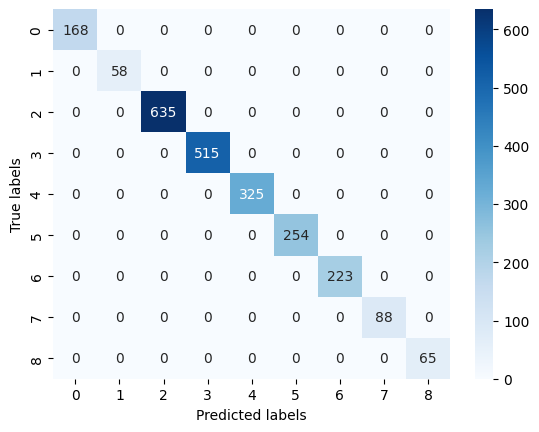

In [115]:
y_pred_grid = best_model_grid.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_grid)
print("Accuracy on test set: {:.2f}".format(accuracy))
confusion_grid = confusion_matrix(y_valid, y_pred_grid)
# print("Confusion matrix: \n", confusion_grid)
sns.heatmap(confusion_grid, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [116]:
# %time
# print(f"Train acc: {best_model_grid.score(X_train, y_train):.3f}")
# print(f"valid acc: {best_model_grid.score(X_valid, y_valid):.3f}")

# y_pred = best_model_grid.predict(X_valid)
# print(y_pred)
# print(classification_report(y_valid, y_pred))

import timeit

# Đo thời gian cho từng câu lệnh riêng lẻ
start_time = timeit.default_timer()
train_acc = best_model_grid.score(X_train, y_train)
train_time = timeit.default_timer() - start_time

start_time = timeit.default_timer()
valid_acc = best_model_grid.score(X_valid, y_valid)
valid_time = timeit.default_timer() - start_time

start_time = timeit.default_timer()
y_pred = best_model_grid.predict(X_valid)
predict_time = timeit.default_timer() - start_time

start_time = timeit.default_timer()
report = classification_report(y_valid, y_pred)
report_time = timeit.default_timer() - start_time

print(f"Train acc: {train_acc:.3f} (Elapsed time: {train_time:.6f} seconds)")
print(f"Valid acc: {valid_acc:.3f} (Elapsed time: {valid_time:.6f} seconds)")
print(y_pred)
print(report)
print(f"Elapsed time for prediction: {predict_time:.6f} seconds")
print(f"Elapsed time for classification report: {report_time:.6f} seconds")

Train acc: 1.000 (Elapsed time: 0.004559 seconds)
Valid acc: 1.000 (Elapsed time: 0.002155 seconds)
[4 6 2 ... 2 5 5]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00       635
           3       1.00      1.00      1.00       515
           4       1.00      1.00      1.00       325
           5       1.00      1.00      1.00       254
           6       1.00      1.00      1.00       223
           7       1.00      1.00      1.00        88
           8       1.00      1.00      1.00        65

    accuracy                           1.00      2331
   macro avg       1.00      1.00      1.00      2331
weighted avg       1.00      1.00      1.00      2331

Elapsed time for prediction: 0.001554 seconds
Elapsed time for classification report: 0.009891 seconds


### Phân loại trên tập kiểm thử

In [117]:
players_test = players_test_original.copy()

In [118]:
y_test_new = best_model_grid.predict(players_test)

In [119]:
players_test['predicted_cluster'] = y_test_new

In [120]:
players_test.head()

,market_value,age,height,attacking,technical,tactical,defending,creativity,saves,anticipation,...,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_G,pos_M,foot_Both,foot_Left,foot_Right,predicted_cluster
0,0.059459,0.407408,0.380005,0.367816,0.898876,0.200010,0.717391,0.666667,0.000000,0.00,...,0.464286,0.983023,False,False,False,True,False,False,True,2
1,0.010306,0.592585,0.380005,0.609195,0.640449,0.337504,0.358696,0.752688,0.000000,0.00,...,0.660714,0.938469,False,False,False,True,False,False,True,2
2,0.006679,0.481479,0.679992,0.781609,0.943820,0.175011,0.391304,0.247312,0.000000,0.00,...,0.178571,0.681609,True,False,False,False,False,False,True,3
3,0.007179,0.370373,0.619995,0.000000,0.000000,0.037517,0.000000,0.000000,0.662921,0.64,...,0.428571,0.938791,False,False,True,False,False,False,True,0
4,0.004803,0.407408,0.460001,0.034483,0.606742,0.962477,0.380435,0.333333,0.000000,0.00,...,0.267857,0.619220,False,True,False,False,False,False,True,4


In [121]:
players_test.to_csv('players_with_labels_test_logistic.csv', index=False)

## ** Phân loại với Random Forest **

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
players_test = players_test_original.copy()

In [124]:
# Ví dụ về các siêu tham số và giá trị
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', 10, 22]
}

In [125]:
# GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)


In [126]:
# Dùng GridSearchCV
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


Best hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [127]:
best_model_grid = RandomForestClassifier(**grid_search.best_params_)
best_model_grid.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

Accuracy on test set: 1.00


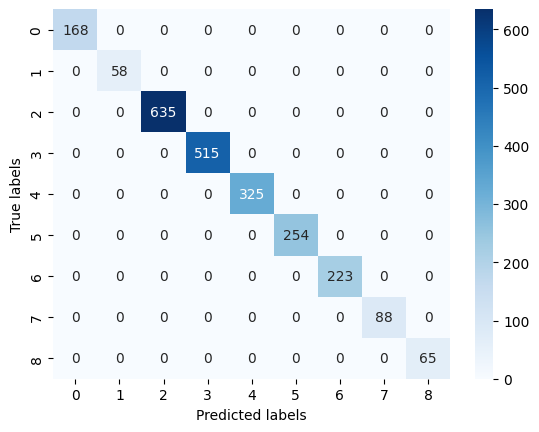

In [128]:
y_pred_grid = best_model_grid.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_grid)
print("Accuracy on test set: {:.2f}".format(accuracy))
confusion_grid = confusion_matrix(y_valid, y_pred_grid)
# print("Confusion matrix: \n", confusion_grid)
sns.heatmap(confusion_grid, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [129]:
import timeit

# Đo thời gian cho từng câu lệnh riêng lẻ
start_time = timeit.default_timer()
train_acc = best_model_grid.score(X_train, y_train)
train_time = timeit.default_timer() - start_time

start_time = timeit.default_timer()
valid_acc = best_model_grid.score(X_valid, y_valid)
valid_time = timeit.default_timer() - start_time

start_time = timeit.default_timer()
y_pred = best_model_grid.predict(X_valid)
predict_time = timeit.default_timer() - start_time

start_time = timeit.default_timer()
report = classification_report(y_valid, y_pred)
report_time = timeit.default_timer() - start_time

print(f"Train acc: {train_acc:.3f} (Elapsed time: {train_time:.6f} seconds)")
print(f"Valid acc: {valid_acc:.3f} (Elapsed time: {valid_time:.6f} seconds)")
print(y_pred)
print(report)
print(f"Elapsed time for prediction: {predict_time:.6f} seconds")
print(f"Elapsed time for classification report: {report_time:.6f} seconds")

Train acc: 1.000 (Elapsed time: 0.047355 seconds)
Valid acc: 1.000 (Elapsed time: 0.013850 seconds)
[4 6 2 ... 2 5 5]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00       635
           3       1.00      1.00      1.00       515
           4       1.00      1.00      1.00       325
           5       1.00      1.00      1.00       254
           6       1.00      1.00      1.00       223
           7       1.00      1.00      1.00        88
           8       1.00      1.00      1.00        65

    accuracy                           1.00      2331
   macro avg       1.00      1.00      1.00      2331
weighted avg       1.00      1.00      1.00      2331

Elapsed time for prediction: 0.012957 seconds
Elapsed time for classification report: 0.005888 seconds


### Kiểm thử trên tập dữ liệu mới 

In [130]:
players_test = players_test_original.copy()
y_test_new = best_model_grid.predict(players_test)

In [131]:
players_test['predicted_cluster'] = y_test_new

In [132]:
players_test.head(3)

,market_value,age,height,attacking,technical,tactical,defending,creativity,saves,anticipation,...,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_G,pos_M,foot_Both,foot_Left,foot_Right,predicted_cluster
0,0.059459,0.407408,0.380005,0.367816,0.898876,0.200010,0.717391,0.666667,0.0,0.0,...,0.464286,0.983023,False,False,False,True,False,False,True,2
1,0.010306,0.592585,0.380005,0.609195,0.640449,0.337504,0.358696,0.752688,0.0,0.0,...,0.660714,0.938469,False,False,False,True,False,False,True,2
2,0.006679,0.481479,0.679992,0.781609,0.943820,0.175011,0.391304,0.247312,0.0,0.0,...,0.178571,0.681609,True,False,False,False,False,False,True,3


In [133]:
players_test.to_csv('players_with_labels_test_randomforest.csv', index=False)

## ** Phân loại với K-Nearest Neighbors **

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
players_test = players_test_original.copy()

In [136]:
players_test_original.head()

,market_value,age,height,attacking,technical,tactical,defending,creativity,saves,anticipation,...,avg_score_last_12_months,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_G,pos_M,foot_Both,foot_Left,foot_Right
0,0.059459,0.407408,0.380005,0.367816,0.898876,0.200010,0.717391,0.666667,0.000000,0.00,...,0.477833,0.464286,0.983023,False,False,False,True,False,False,True
1,0.010306,0.592585,0.380005,0.609195,0.640449,0.337504,0.358696,0.752688,0.000000,0.00,...,0.379310,0.660714,0.938469,False,False,False,True,False,False,True
2,0.006679,0.481479,0.679992,0.781609,0.943820,0.175011,0.391304,0.247312,0.000000,0.00,...,0.339901,0.178571,0.681609,True,False,False,False,False,False,True
3,0.007179,0.370373,0.619995,0.000000,0.000000,0.037517,0.000000,0.000000,0.662921,0.64,...,0.482759,0.428571,0.938791,False,False,True,False,False,False,True
4,0.004803,0.407408,0.460001,0.034483,0.606742,0.962477,0.380435,0.333333,0.000000,0.00,...,0.354680,0.267857,0.619220,False,True,False,False,False,False,True


In [137]:
param_grid = {
    'n_neighbors': [3, 7, 15, 31, 43],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]
}

In [138]:
# GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [139]:
# Dùng GridSearchCV
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


Best hyperparameters:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [140]:
best_model_grid = KNeighborsClassifier(**grid_search.best_params_)
best_model_grid.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=3, p=1)

Accuracy on test set: 1.00


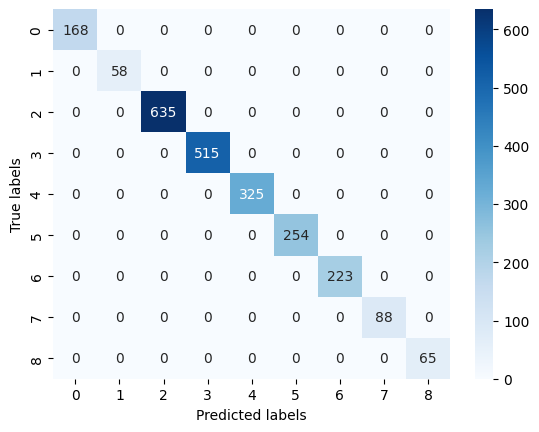

In [141]:

y_pred_grid = best_model_grid.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_grid)
print("Accuracy on test set: {:.2f}".format(accuracy))
confusion_grid = confusion_matrix(y_valid, y_pred_grid)
# print("Confusion matrix: \n", confusion_grid)
sns.heatmap(confusion_grid, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [142]:
import timeit

# Đo thời gian cho từng câu lệnh riêng lẻ
start_time = timeit.default_timer()
train_acc = best_model_grid.score(X_train, y_train)
train_time = timeit.default_timer() - start_time

start_time = timeit.default_timer()
valid_acc = best_model_grid.score(X_valid, y_valid)
valid_time = timeit.default_timer() - start_time

start_time = timeit.default_timer()
y_pred = best_model_grid.predict(X_valid)
predict_time = timeit.default_timer() - start_time

start_time = timeit.default_timer()
report = classification_report(y_valid, y_pred)
report_time = timeit.default_timer() - start_time

print(f"Train acc: {train_acc:.3f} (Elapsed time: {train_time:.6f} seconds)")
print(f"Valid acc: {valid_acc:.3f} (Elapsed time: {valid_time:.6f} seconds)")
print(y_pred)
print(report)
print(f"Elapsed time for prediction: {predict_time:.6f} seconds")
print(f"Elapsed time for classification report: {report_time:.6f} seconds")


Train acc: 1.000 (Elapsed time: 0.407286 seconds)
Valid acc: 1.000 (Elapsed time: 0.118232 seconds)
[4 6 2 ... 2 5 5]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00       635
           3       1.00      1.00      1.00       515
           4       1.00      1.00      1.00       325
           5       1.00      1.00      1.00       254
           6       1.00      1.00      1.00       223
           7       1.00      1.00      1.00        88
           8       1.00      1.00      1.00        65

    accuracy                           1.00      2331
   macro avg       1.00      1.00      1.00      2331
weighted avg       1.00      1.00      1.00      2331

Elapsed time for prediction: 0.116822 seconds
Elapsed time for classification report: 0.007395 seconds


### Kiểm thử trên tập dữ liệu kiểm thử

In [143]:
players_test = players_test_original.copy()
y_test_new = best_model_grid.predict(players_test)

In [144]:
players_test['predicted_cluster'] = y_test_new

In [145]:
players_test.head(3)

,market_value,age,height,attacking,technical,tactical,defending,creativity,saves,anticipation,...,appearances_last_12_months,point_of_tournament,pos_D,pos_F,pos_G,pos_M,foot_Both,foot_Left,foot_Right,predicted_cluster
0,0.059459,0.407408,0.380005,0.367816,0.898876,0.200010,0.717391,0.666667,0.0,0.0,...,0.464286,0.983023,False,False,False,True,False,False,True,2
1,0.010306,0.592585,0.380005,0.609195,0.640449,0.337504,0.358696,0.752688,0.0,0.0,...,0.660714,0.938469,False,False,False,True,False,False,True,2
2,0.006679,0.481479,0.679992,0.781609,0.943820,0.175011,0.391304,0.247312,0.0,0.0,...,0.178571,0.681609,True,False,False,False,False,False,True,3


In [146]:
players_test.to_csv('players_with_labels_test_knn.csv', index=False)

In [147]:
# get last column of players_with_labels_test_logistic.csv and players_with_labels_test_randomforest.csv and check accuracy
players_test_logistic = pd.read_csv('players_with_labels_test_logistic.csv')
players_test_randomforest = pd.read_csv('players_with_labels_test_randomforest.csv')
players_test_knn = pd.read_csv('players_with_labels_test_knn.csv')

y_valid_logistic = players_test_logistic['predicted_cluster']
y_valid_randomforest = players_test_randomforest['predicted_cluster']
y_valid_knn = players_test_knn['predicted_cluster']

logistic_randomforest = accuracy_score(y_valid_randomforest, y_valid_logistic)
randomforest_knn = accuracy_score(y_valid_logistic, y_valid_randomforest)
knn_logistic = accuracy_score(y_valid_logistic, y_valid_knn)



print('Compare logistic regression and Random Forest:', logistic_randomforest)
print('Compare random forest and KNN: ', randomforest_knn)
print('Compare KNN and Logistic Regression:', knn_logistic)

Compare logistic regression and Random Forest: 1.0
Compare random forest and KNN:  1.0
Compare KNN and Logistic Regression: 1.0


### ** Kết luận, đánh giá chung **

**``Kết luận``**
- Cả 3 mô hình phân loại đều cho kết quả dự đoán cao (100%)  với thời gian thực thi có sự chênh lệch khá lớn giữa: 
    + Logistic Regression có thời gian thực thi nhanh nhất (1.5ms) 
    + K-Nearest Neighbors có thời gian thực thi chậm nhất (116.8ms) 
    
- So sánh kết quả phân loại trên tập kiểm thử với 3 mô hình đều cho cùng kết quả phân loại.

- Độ chính xác trên tập xác thực cao (100%) là do ở quá trình phân cụm dữ liệu cho tập huấn luyện và xác thực. Do các biến đặc trưng có giá trị phân bố trải đều, ít tách biệt dẫn đến ít sự tác động đến kết quả phân cụm, làm cho sự ảnh hưởng của các biến đặc trưng danh mục là rất lớn (vị trí đá và chân sở trường). Do đó, dựa vào giá trị của các biến đặc trưng danh mục sẽ nhanh chóng được phân loại vào kết quả cụm chính xác. Làm khả năng phân loại trên tập kiểm thử cũng đạt độ chính xác cao